## Dependencies

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [19]:
folder = '../input/g-research-crypto-forecasting/'

# Train data
base_train = pd.read_csv(folder+'train.csv')

# Assets
asset_mapping = pd.read_csv(folder+'asset_details.csv')
asset_mapping

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


## Preprocessing Data

In [20]:
# converting the timestamp to minutes
base_train['time'] = pd.to_datetime(base_train['timestamp'], unit='s')
base_train.head(50)

base_train.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
time              0
dtype: int64

In [21]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:GPU:0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 23956867 to 24236795
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  20000 non-null  int64         
 1   Asset_ID   20000 non-null  int64         
 2   Count      20000 non-null  float64       
 3   Open       20000 non-null  float64       
 4   High       20000 non-null  float64       
 5   Low        20000 non-null  float64       
 6   Close      20000 non-null  float64       
 7   Volume     20000 non-null  float64       
 8   VWAP       20000 non-null  float64       
 9   Target     19984 non-null  float64       
 10  time       20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 1.8 MB
None


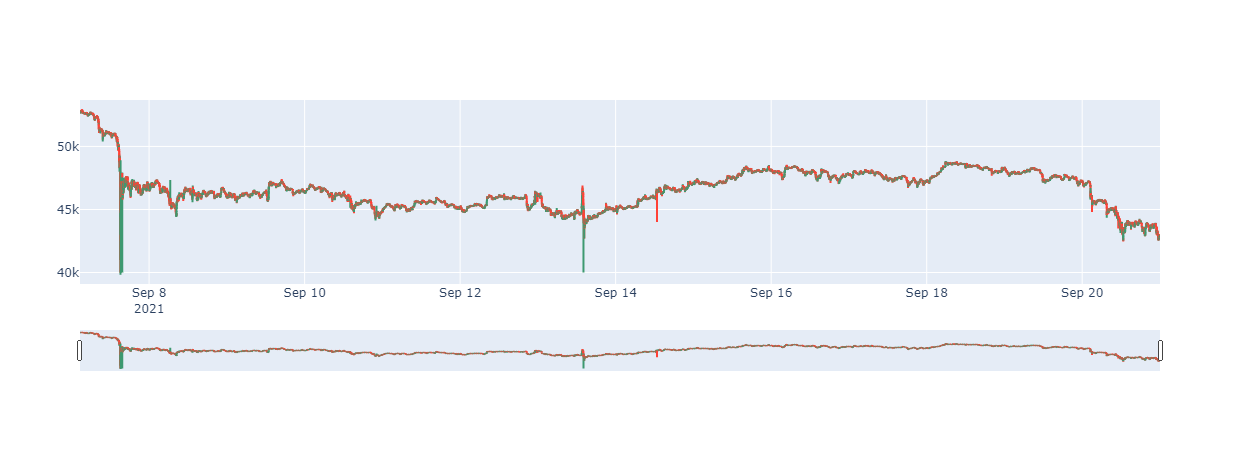

In [22]:
btc = base_train.loc[base_train['Asset_ID'] == 1].iloc[-20000:, :]

print(btc.info())

with tf.device('/GPU:0'):
    fig = go.Figure(data=go.Ohlc(x=btc.time,
                open=btc.Open,
                high=btc.High,
                low=btc.Low,
                close=btc.Close))
    fig.show()